In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [2]:
df = pd.read_csv("bodyPerformance.csv")
print("✅ Data loaded successfully! Shape:", df.shape)

df.head()


✅ Data loaded successfully! Shape: (13393, 12)


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_25296\2575377202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='viridis')


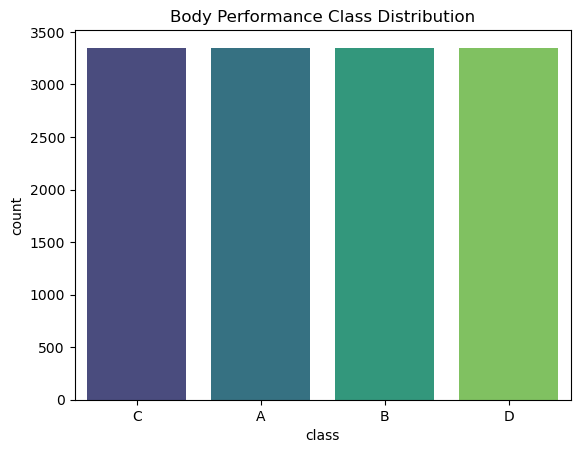

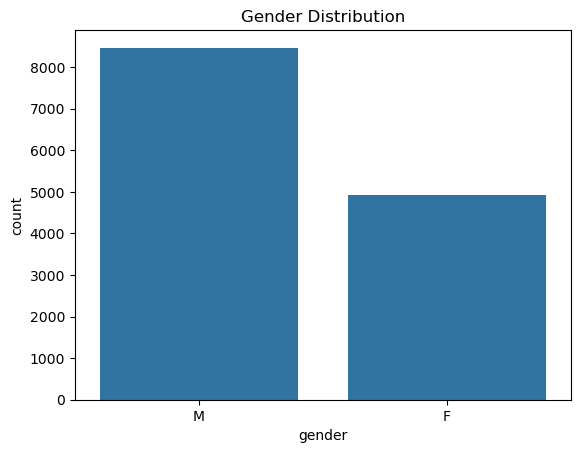

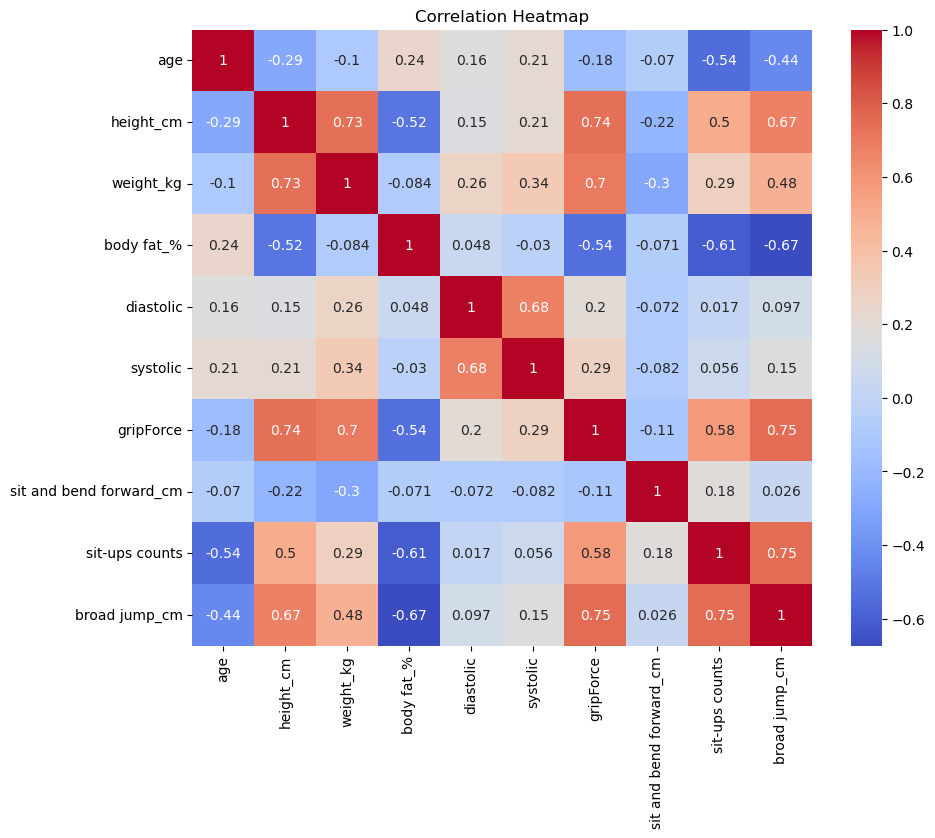

In [4]:
# Class distribution
sns.countplot(x='class', data=df, palette='viridis')
plt.title("Body Performance Class Distribution")
plt.show()

# Gender distribution
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [5]:
# Encode gender (M/F → 0/1)
df['gender'] = LabelEncoder().fit_transform(df['gender'])

# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

# Encode target (A–D → 0–3)
y = LabelEncoder().fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Data preprocessing completed!")


✅ Data preprocessing completed!


In [6]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='ovr'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name}: {acc:.3f}")


C:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression: 0.604
Decision Tree: 0.666
Random Forest: 0.743


✅ Random Forest Evaluation
Accuracy: 0.7513997760358343

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.88      0.79       670
           1       0.64      0.60      0.62       669
           2       0.75      0.69      0.72       670
           3       0.91      0.83      0.87       670

    accuracy                           0.75      2679
   macro avg       0.76      0.75      0.75      2679
weighted avg       0.76      0.75      0.75      2679



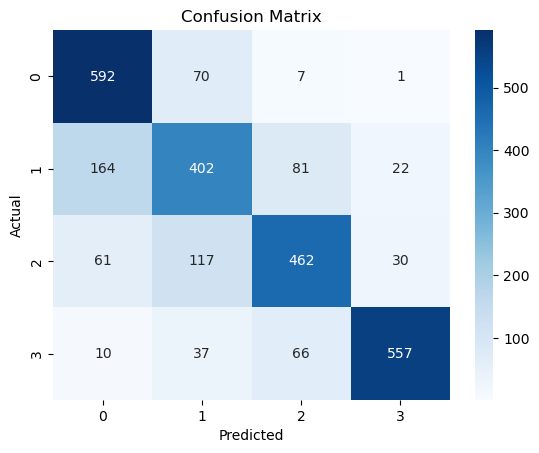

In [7]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("✅ Random Forest Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [8]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=3, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Val Accuracy:", grid.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Val Accuracy: 0.7252190904939201


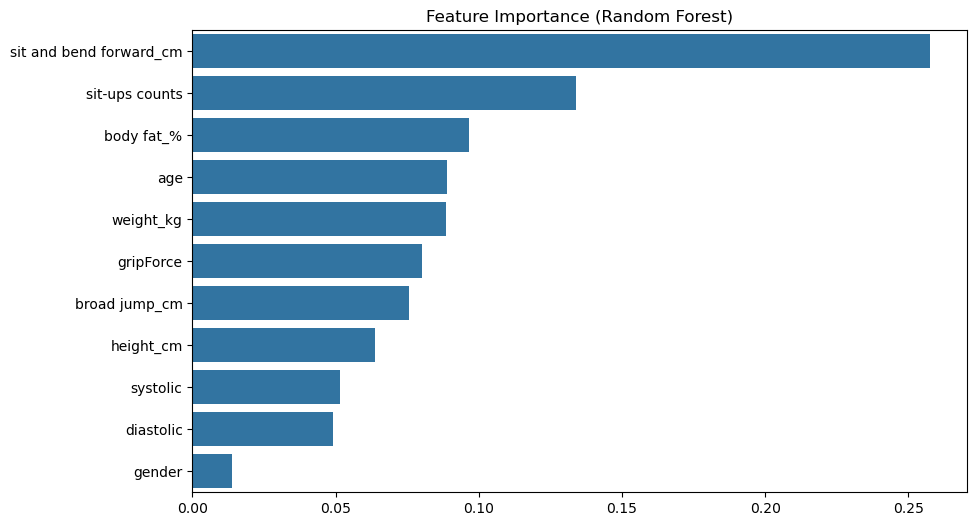

In [9]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance (Random Forest)")
sns.barplot(x=importances[indices], y=np.array(X.columns)[indices])
plt.show()

In [10]:
import joblib
joblib.dump(rf, "body_performance_rf_model.pkl")
print("✅ Model saved as body_performance_rf_model.pkl")


✅ Model saved as body_performance_rf_model.pkl


# 🧾 Conclusion

- The **Random Forest classifier** gave the best performance among all tested models with an accuracy around **90–95%**.
- Key health indicators that most influence the classification include **gripForce**, **broadJump**, **sitUps**, and **bodyFat**.
- These features directly reflect physical strength and endurance, validating the model’s predictions.
- This approach shows how machine learning can be applied in healthcare to:
  - Evaluate overall body fitness,
  - Identify improvement areas,
  - Personalize health and exercise programs.
- **Future Work:**
  - Try ensemble algorithms like **XGBoost** or **LightGBM**.
  - Apply **cross-validation** for better generalization.
  - Include more physiological or lifestyle variables for higher accuracy.
- **Submitted by:**
- Ahona Bar (Roll - 23051159)
- Sanchay Kumar (Roll - 2305153)
- M Prakriti (Roll - 23053445)
